From the dataset called faithful load column named eruptions and compute the Kernel De
nsity Estimation (estimating probability density function) of the data. Also, consider the the method of Sheather & Jones(sj) as the smoothing parameter (bandwidth(bw)).
After store density vector to the variable "d", print d on the console and plot it. 


Call:
	density.default(x = faithful$eruptions, bw = "sj")

Data: faithful$eruptions (272 obs.);	Bandwidth 'bw' = 0.14

       x               y            
 Min.   :1.180   Min.   :0.0001834  
 1st Qu.:2.265   1st Qu.:0.0422638  
 Median :3.350   Median :0.1709243  
 Mean   :3.350   Mean   :0.2301726  
 3rd Qu.:4.435   3rd Qu.:0.4134348  
 Max.   :5.520   Max.   :0.5945634  

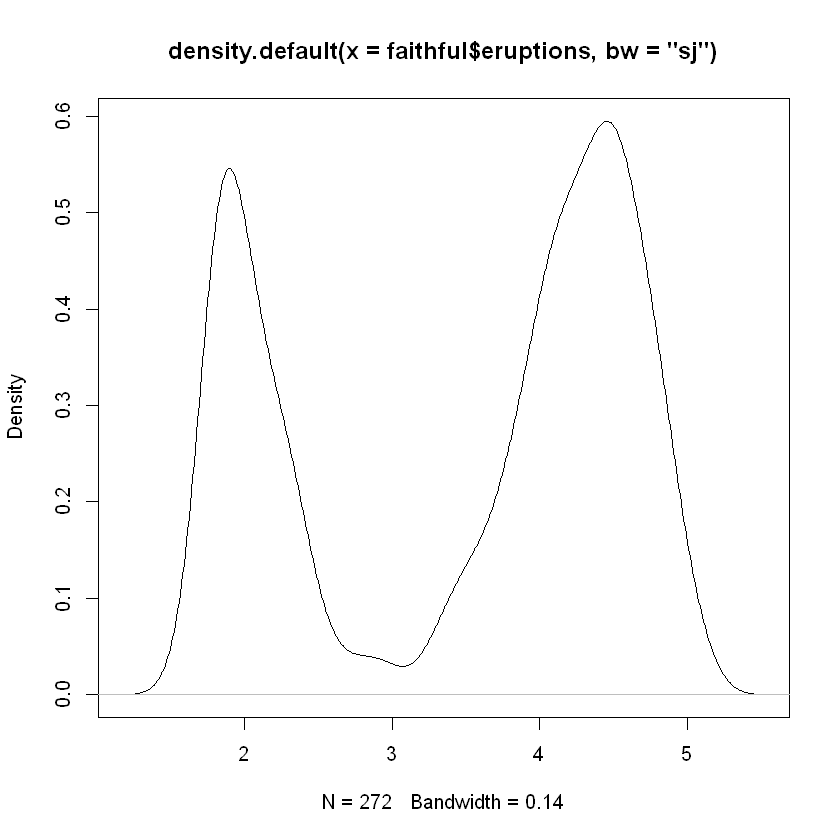

In [1]:
# The Old Faithful geyser data 
d <- density(faithful$eruptions, bw = "sj")
d 
plot(d)

We will generate the multivariate samples according to the same mean and covariance structure as the four-dimensional iris virginica data using Choleski Factorization method.

In [2]:
y <- subset(x=iris, Species=="virginica")[, 1:4] 
mu <- colMeans(y)
Sigma <- cov(y)

In [3]:
mu

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       6.588        2.974        5.552        2.026

In [4]:
Sigma

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.40434286,0.09376327,0.30328980,0.04909388
Sepal.Width,0.09376327,0.10400408,0.07137959,0.04762857
Petal.Length,0.30328980,0.07137959,0.30458776,0.04882449
Petal.Width,0.04909388,0.04762857,0.04882449,0.07543265


In [6]:
rmvn.Choleski <- function(n, mu, Sigma) { 
  # generate n random vectors from MVN(mu, Sigma) # dimension is inferred from mu and Sigma 
  d <- length(mu) 
  Q <- chol(Sigma) # Choleski factorization of Sigma (Q is the upper triangular matrix of choleski dico)
  Z <- matrix(rnorm(n*d), nrow=n, ncol=d) 
  X <- Z %*% Q + matrix(mu, n, d, byrow=TRUE) 
  X }

In [7]:
#now generate MVN data with this mean and covariance 
X <- rmvn.Choleski(200, mu, Sigma) 

In [8]:
dim(X)

[1] 200   4

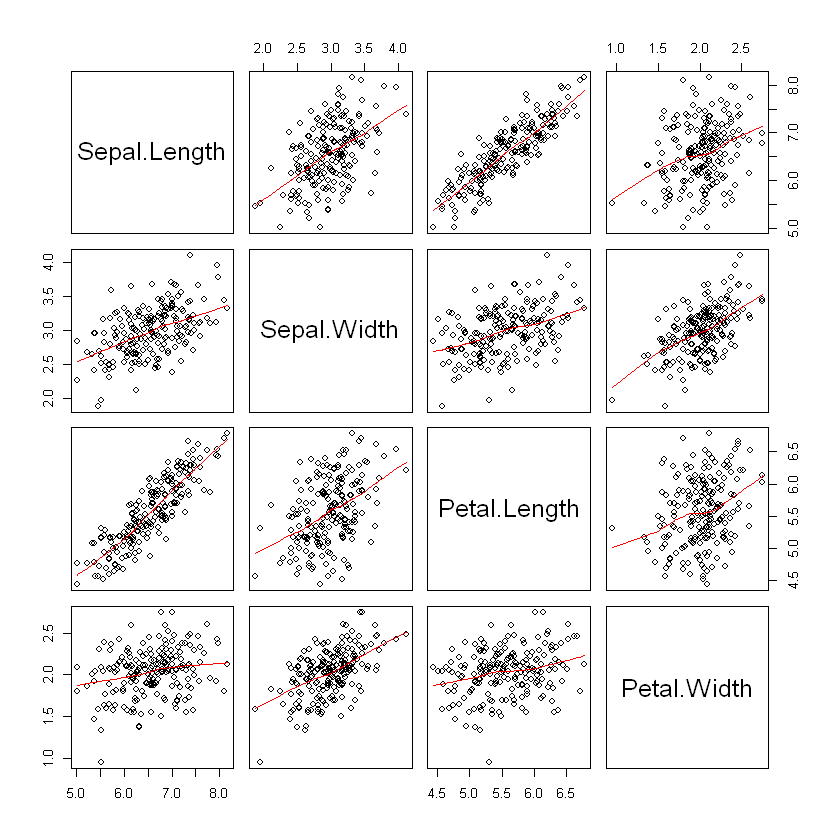

In [9]:
pairs(X,  panel = panel.smooth)

Lets consider the Volcano dataset in R

In [12]:
dim(volcano)

[1] 87 61

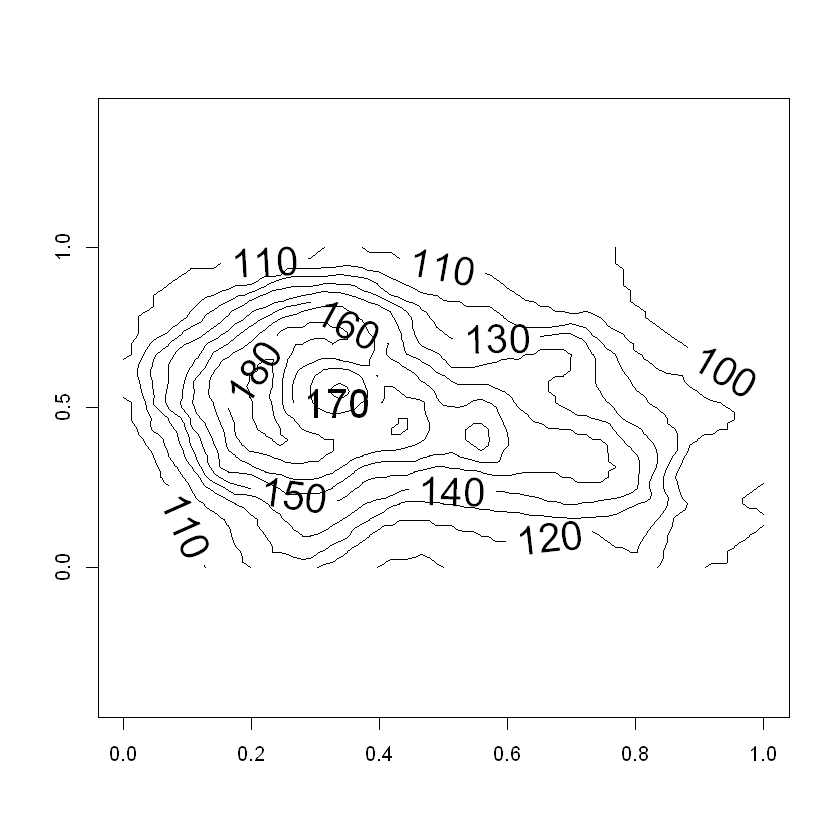

In [13]:
#contour plot with labels 
contour(volcano, asp = 0.5, labcex = 2)

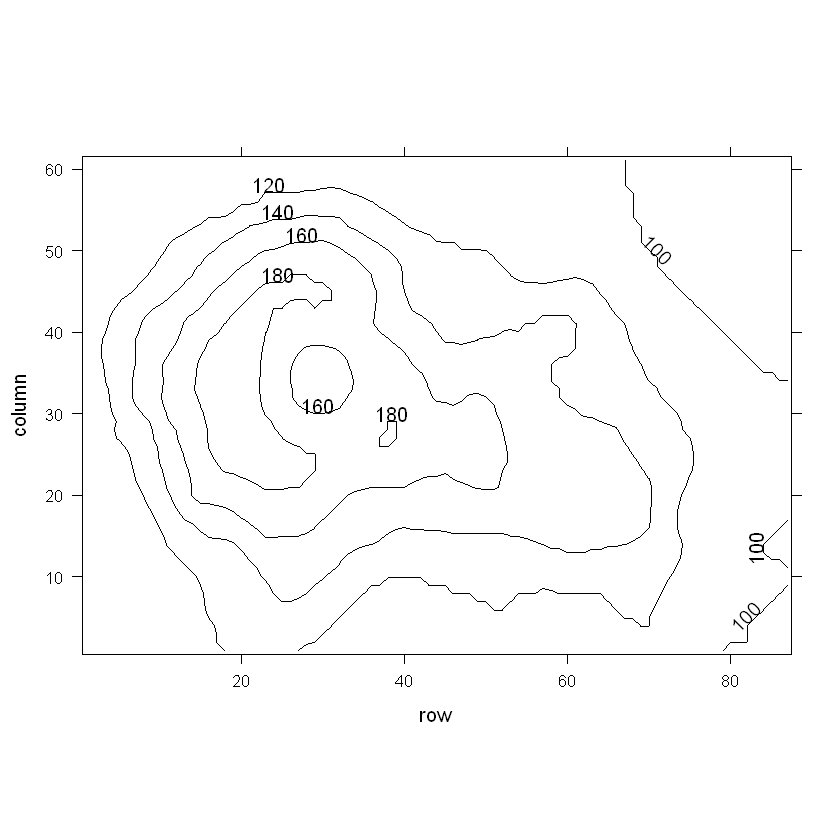

In [14]:
#another version from lattice package ]
library(lattice) 
contourplot(volcano) #similar to above

In [15]:
install.packages("rgl")

also installing the dependencies 'miniUI', 'webshot', 'crosstalk', 'manipulateWidget'



package 'miniUI' successfully unpacked and MD5 sums checked
package 'webshot' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'manipulateWidget' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\thili\AppData\Local\Temp\RtmpC2OnBr\downloaded_packages


In [16]:
library(rgl)

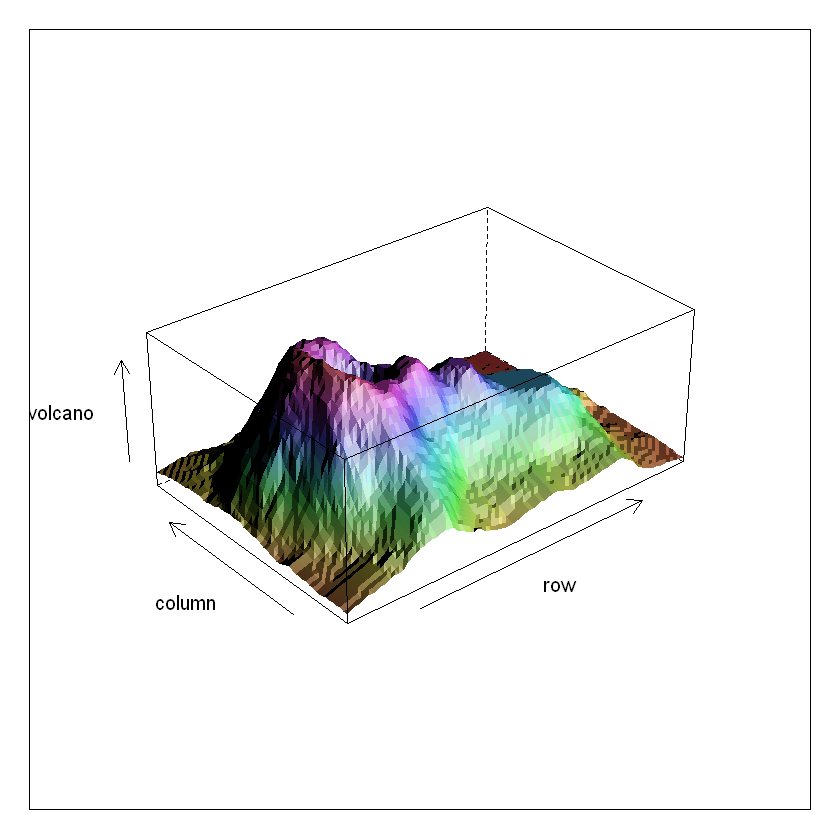

In [17]:
## volcano  ## 87 x 61 matrix
wireframe(volcano, shade = TRUE,
          aspect = c(61/87, 0.4),
          light.source = c(10,0,10))

Again with Iris data set

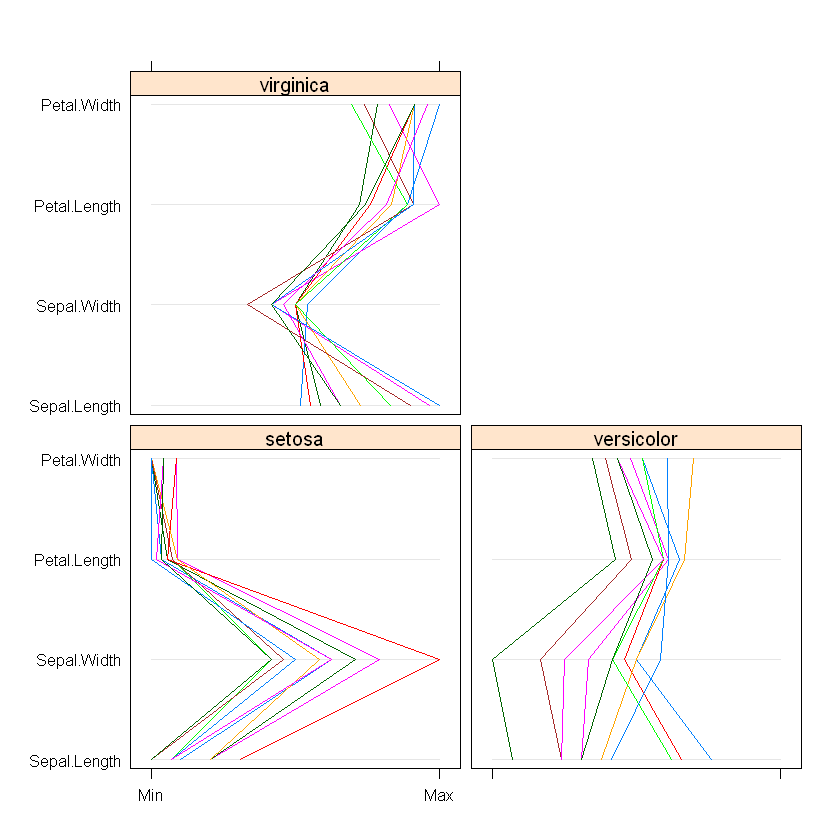

In [21]:
library(MASS) 
library(lattice) 
#trellis.device(color = FALSE) #black and white display 
x <- iris[seq(1, 150, 5), ] #get every fifth obs. 
parallelplot(~x[1:4] | Species, x)